In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

In [2]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

from model import Model

/home/seongun/anaconda3/envs/xai-robot/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/seongun/anaconda3/envs/xai-robot/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/seongun/anaconda3/envs/xai-robot/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/seongun/anaconda3/envs/xai-r

In [3]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
model = Model(sess)

In [4]:
model.train()


Checkpoint at epoch 1

---------------
Checkpoint is saved to ./checkpoint/mnist.


Checkpoint at epoch 2

---------------
Checkpoint is saved to ./checkpoint/mnist.


Checkpoint at epoch 3

---------------
Checkpoint is saved to ./checkpoint/mnist.


Checkpoint at epoch 4

---------------
Checkpoint is saved to ./checkpoint/mnist.


Checkpoint at epoch 5

---------------
Checkpoint is saved to ./checkpoint/mnist.


Checkpoint at epoch 6

---------------
Checkpoint is saved to ./checkpoint/mnist.


Checkpoint at epoch 7

---------------
Checkpoint is saved to ./checkpoint/mnist.


Checkpoint at epoch 8

---------------
Checkpoint is saved to ./checkpoint/mnist.


Checkpoint at epoch 9

---------------
Checkpoint is saved to ./checkpoint/mnist.


Checkpoint at epoch 10

---------------
Checkpoint is saved to ./checkpoint/mnist.



In [5]:
model.test()


---------------
Checkpoint at ./checkpoint/ is restored.


---------------
Accuracy: 98.86



In [6]:
images, heatmaps_dtd = model.explain(method='dtd', num_visualize=50)


---------------
Checkpoint at ./checkpoint is restored.



In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def visualize_heatmap(image, heatmap):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    axes[0].set_title('original image')
    axes[0].axis('off')
    im1 = axes[0].imshow(image.squeeze(2), cmap='gray')
    
    axes[1].set_title('heatmap')
    axes[1].axis('off')
    im2 = axes[1].imshow(heatmap.squeeze(2), cmap='Reds')
    divider = make_axes_locatable(axes[1])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im2, cax=cax, orientation='vertical')
    
    fig.show()

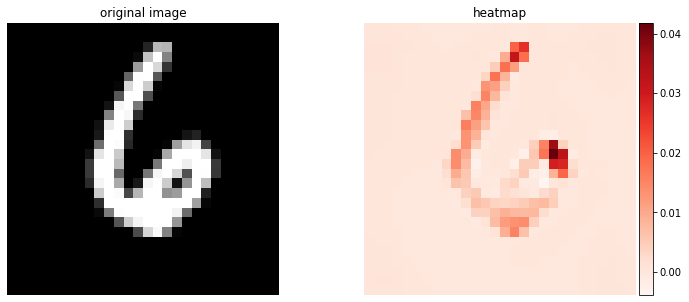

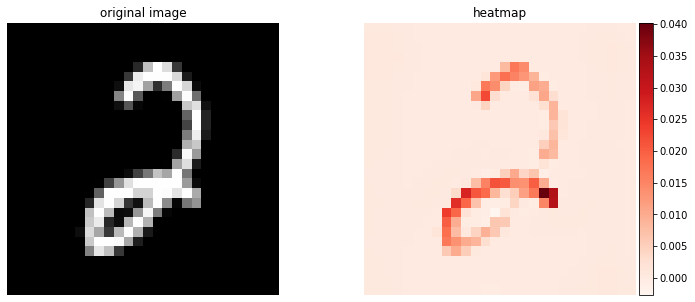

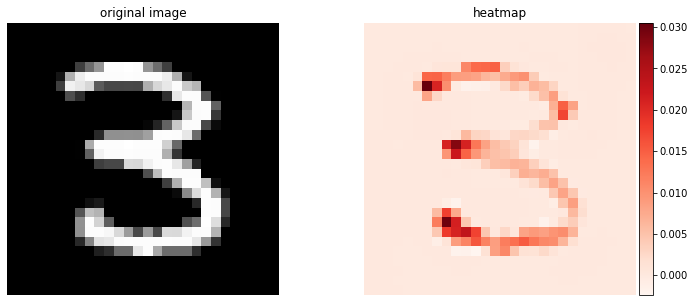

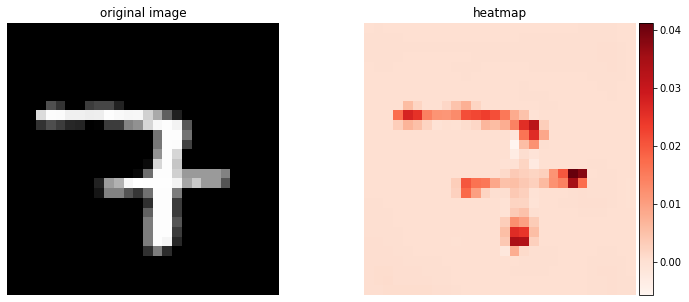

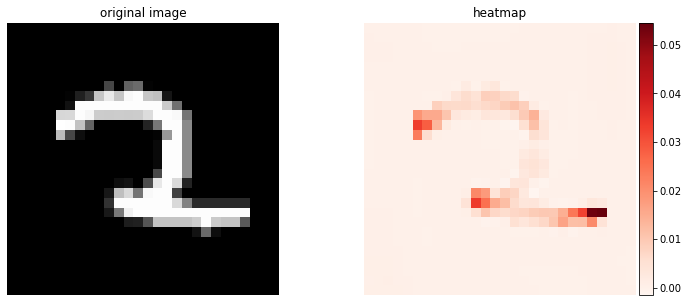

In [8]:
for i in range(5):
    visualize_heatmap(images[i], heatmaps_dtd[i])

In [9]:
images, heatmaps_integrated = model.explain(method='integrated', num_visualize=50)


---------------
Checkpoint at ./checkpoint is restored.



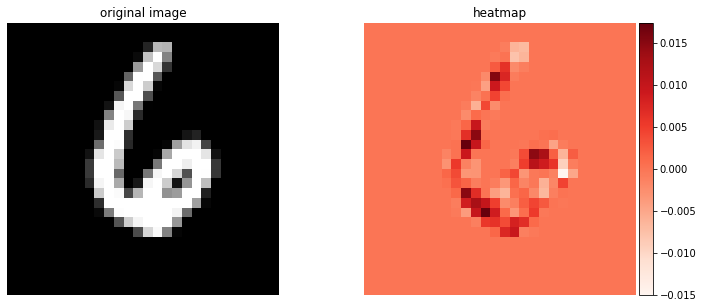

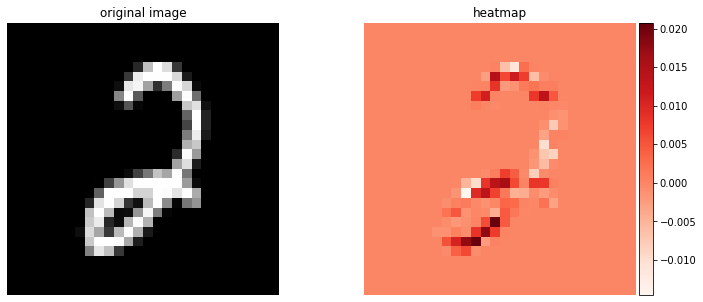

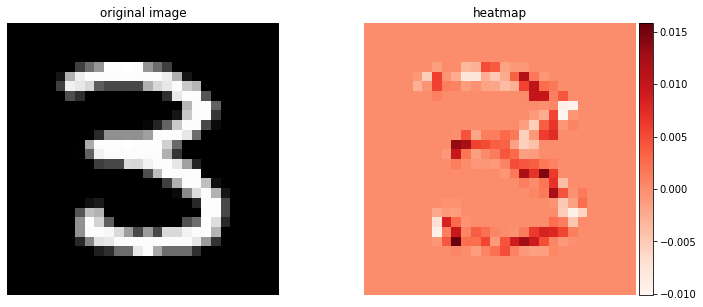

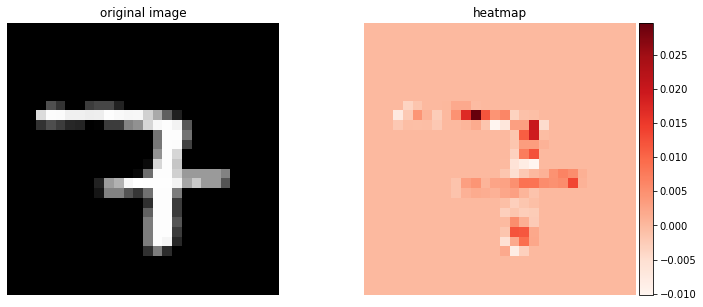

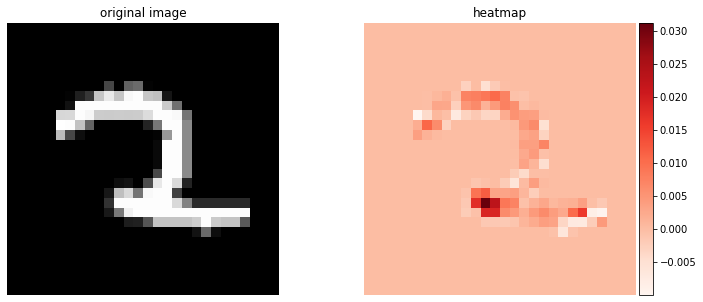

In [10]:
for i in range(5):
    visualize_heatmap(images[i], heatmaps_integrated[i])

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def visualize_heatmap_all(image, heatmap_dtd, heatmap_integrated):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    axes[0].set_title('original image')
    axes[0].axis('off')
    im1 = axes[0].imshow(image.squeeze(2), cmap='gray')
    
    axes[1].set_title('Deep Taylor Decomposition')
    axes[1].axis('off')
    im2 = axes[1].imshow(heatmap_dtd.squeeze(2), cmap='Reds')
    divider = make_axes_locatable(axes[1])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im2, cax=cax, orientation='vertical')

    axes[2].set_title('Integrated Gradients')
    axes[2].axis('off')
    im3 = axes[2].imshow(heatmap_integrated.squeeze(2), cmap='Reds')
    divider = make_axes_locatable(axes[2])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im3, cax=cax, orientation='vertical')

    fig.show()

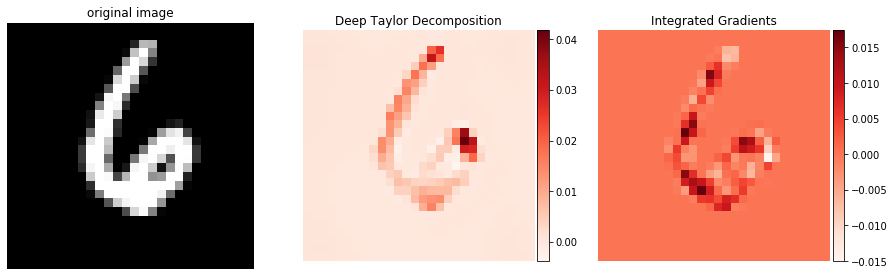

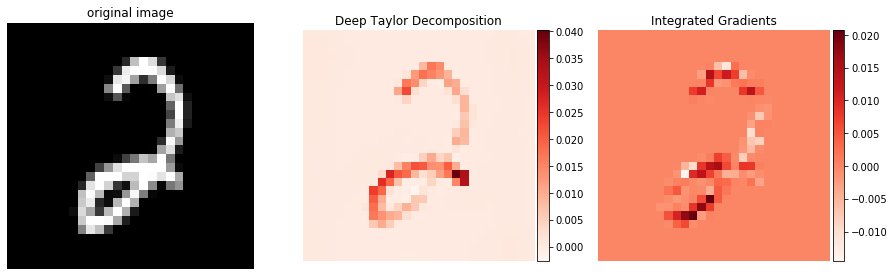

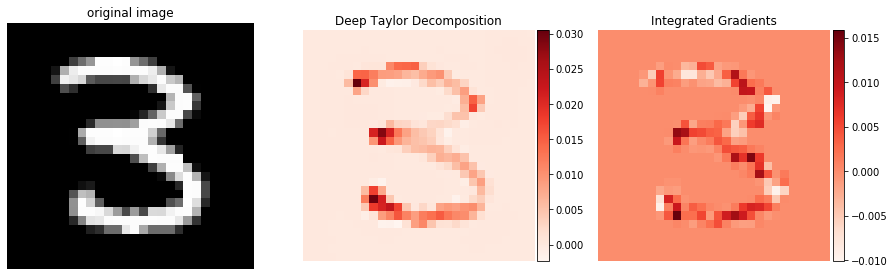

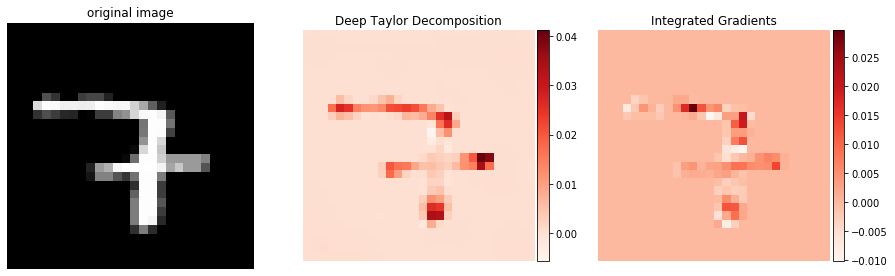

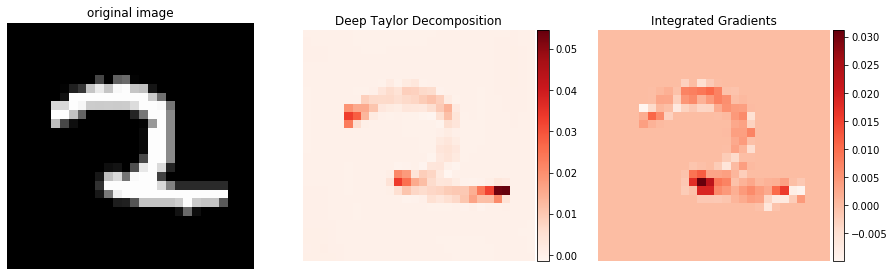

In [12]:
for i in range(5):
    visualize_heatmap_all(images[i], heatmaps_dtd[i], heatmaps_integrated[i])